<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/pyplot.py'>

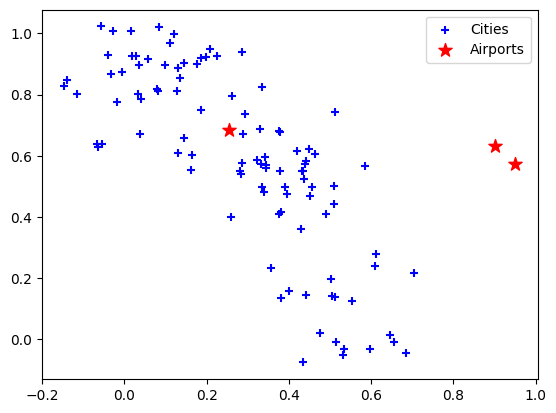

In [5]:
import random
import numpy as np
import matplotlib.pyplot as plt

#amount of cities
num_city = 100
#amount of airports
num_air = 3
#amount of city clusters
num_center = 5
#controls dispersion around city clusters(how close and how far)
sigma = 0.1
#removes duplicate cities, out of orders
cities = set()
airports = []

#5 centers
for i in range(num_center):
    #generate random x and y coords
    x = random.random()
    y = random.random()
    #create cluster coordinates around (x,y) called xc and yc, creates 20 clusters every time based on numCity and numCenter variable
    xc = np.random.normal(x, sigma, num_city//num_center)
    yc = np.random.normal(y, sigma, num_city//num_center)
    #creates set of cities appending xc, yc representing a singular city
    #create 100 cities by the end(idk how)
    #creates coordinates using xc and yc, zip since xc and yc are lists
    cities = cities.union(zip(xc, yc))

#3 airports
for i in range(num_air):
    #generate random x and y coords
    x = random.random()
    y = random.random()
    #appends x,y coord/tuple to airport array
    airports.append((x,y)) 

#create two arrays of categorizes by x  or y (2,3), (3,4), (4,5) -> x: (2,3,4), y:(3,4,5) for zip
zip_cities = zip(*cities)
plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
zip_airs = zip(*airports)
plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
plt.legend()
plt

In [6]:
x1, y1 = airports[0]
x2, y2 = airports[1]
x3, y3 = airports[2]

In [7]:
#minimize distance between airport and city coordinates
def objFunc(cities, x1, x2, x3, y1, y2, y3):
    cityList = list(cities)
    distance = 0
    for i in range(len(cities)):
        xc, yc = cityList[i]
        distance += (x1 - xc) ** 2 + (y1 -yc) ** 2
        distance += (x2 - xc) ** 2 + (y2 -yc) ** 2
        distance += (x3 - xc) ** 2 + (y3 -yc) ** 2
    # return cities
    return distance
print(objFunc(cities, x1, x2, x3, y1, y2, y3))

124.04432023785955


In [8]:
#gradient of objFunction
def grad(cities, x1, x2, x3, y1, y2, y3):
    gradx1 = gradx2 = gradx3 = grady1 = grady2 = grady3 = 0
    gradList = []
    cityList = list(cities)
    for i in range(len(cities)):
        xc, yc = cityList[i]
        gradx1 += (x1 - xc) * 2
        gradx2 += (x2 - xc) * 2
        gradx3 += (x3 - xc) * 2
        grady1 += (y1 - yc) * 2
        grady2 += (y2 - yc) * 2
        grady3 += (y3 - yc) * 2
    gradList.append(gradx1)
    gradList.append(gradx2)
    gradList.append(gradx3)
    gradList.append(grady1)
    gradList.append(grady2)
    gradList.append(grady3)
    return gradList

In [11]:
def gd(alpha, iterations):
    x1, y1 = airports[0]
    x2, y2 = airports[1]
    x3, y3 = airports[2]
    cityList = list(cities)
    iterationArr = []
    objValArr = []
    for i in range(iterations):
        iterationArr.append(i)
        objValue = objFunc(cities, x1, x2, x3, y1, y2, y3)
        objValArr.append(objValue)    
        gradList = grad(cities, x1, x2, x3, y1, y2, y3)
        gradx1 = gradList[0]
        gradx2 = gradList[1]
        gradx3 = gradList[2]
        grady1 = gradList[3]
        grady2 = gradList[4]
        grady3 = gradList[5]
        x1 -= alpha * gradx1
        x2 -= alpha * gradx2
        x3 -= alpha * gradx3
        y1 -= alpha * grady1
        y2 -= alpha * grady2
        y3 -= alpha * grady3
    plt.plot(iterationArr, objValArr)
    plt.xlabel("Step")
    plt.ylabel('Objective Function Value f(x1, y1, x2, y2, x3, y3)')
    plt.title("Objective Function History")
    plt.show()

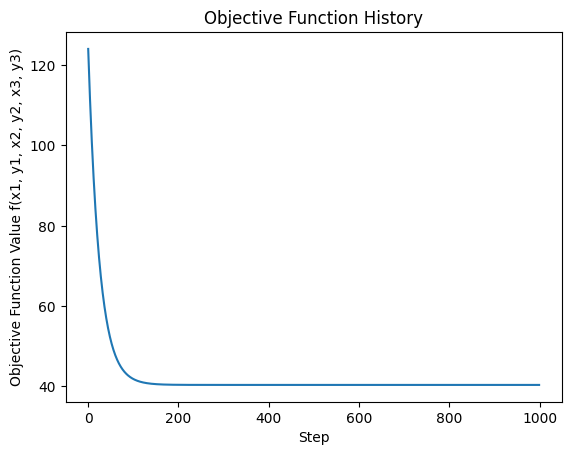

In [16]:
alpha = 0.0001
steps = 1000
gd(alpha, steps)